In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set plot style for better visuals
plt.style.use('seaborn-v0_8-darkgrid')  # Use a valid Seaborn-inspired style
%matplotlib inline

In [6]:
# Load the dataset
file_path = '../data/benin-malanville.csv'
df = pd.read_csv(file_path)
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [7]:
  # Summary statistics for numeric columns
  numeric_summary = df.describe()
  print("Summary Statistics:")
  print(numeric_summary)

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [8]:
  # Missing value report
  missing_values = df.isna().sum()
  print("\nMissing Values per Column:")
  print(missing_values)

  # Identify columns with >5% nulls
  total_rows = len(df)
  columns_with_high_nulls = missing_values[missing_values / total_rows > 0.05].index
  print("\nColumns with >5% null values:", list(columns_with_high_nulls))


Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% null values: ['Comments']


In [9]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_key = df[key_columns]

In [10]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_key, nan_policy='omit'))
outlier_mask = (z_scores > 3).any(axis=1)
df_outliers = df[outlier_mask].copy()
print(f"Number of outlier rows: {len(df_outliers)}")
print("\nOutlier Sample:")
print(df_outliers.head())

Number of outlier rows: 7740

Outlier Sample:
            Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
670  2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2  3.2   
671  2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
672  2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4  3.4   
673  2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2  4.7   
674  2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   

     WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
670     4.1      0.7  190.5     18.4  999         0            0.0   63.0   
671     4.1      0.6  175.8     13.3  999         0            0.0   63.7   
672     4.6      0.9  171.5     11.9  999         0            0.0   65.8   
673     5.6      0.6  160.7      8.0  999         0            0.0   65.4   
674     4.6      0.4  169.1     12.3  999         0            0.0   65.0   

     TModB

In [11]:
# Impute missing values with median for key columns
for column in key_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Verify no more missing values in key columns
print("\nMissing Values After Imputation:")
print(df[key_columns].isna().sum())


Missing Values After Imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


In [12]:
# Export cleaned DataFrame
cleaned_file_path = '../data/benin-malanville.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data exported to {cleaned_file_path}")

Cleaned data exported to ../data/benin-malanville.csv


In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

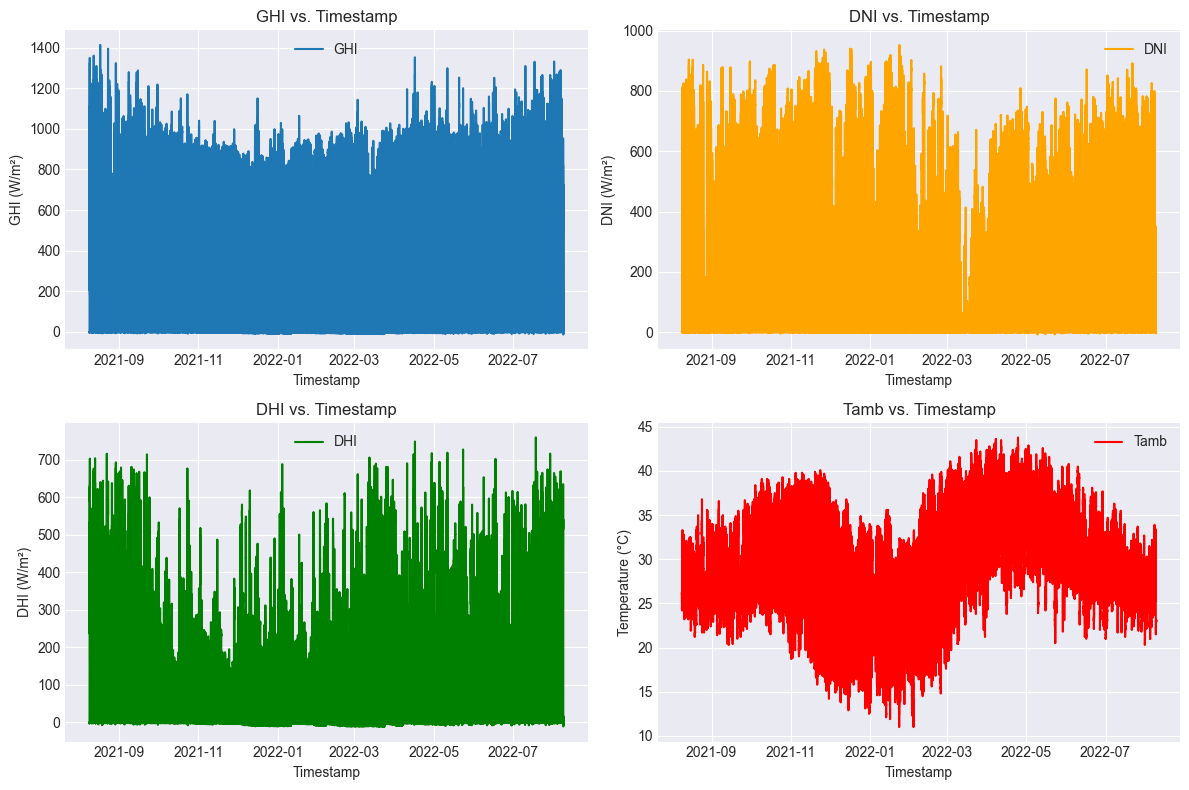

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.title('GHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='orange')
plt.title('DNI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='green')
plt.title('DHI vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb', color='red')
plt.title('Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.tight_layout()
plt.show()

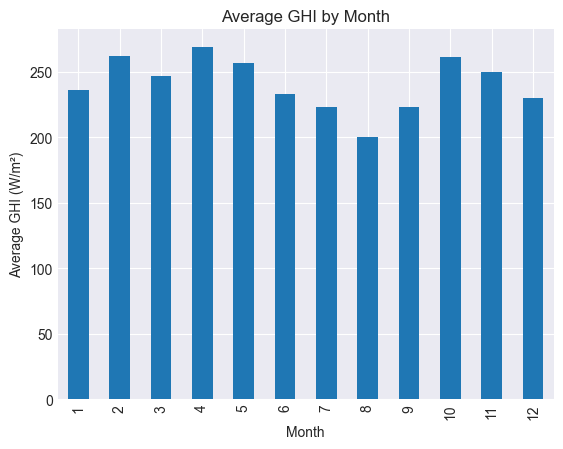

In [15]:
df['Month'] = df['Timestamp'].dt.month
monthly_ghi = df.groupby('Month')['GHI'].mean()
monthly_ghi.plot(kind='bar', title='Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('Average GHI (W/m²)')
plt.show()

In [16]:
df['Cleaning_Flag'] = ~outlier_mask.astype(int)  # 1 if not outlier, 0 if outlier

C:\Users\hp\AppData\Local\Temp\ipykernel_20324\695238439.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cleaning_Flag', y='ModA', data=df, estimator=np.mean, ci=None)


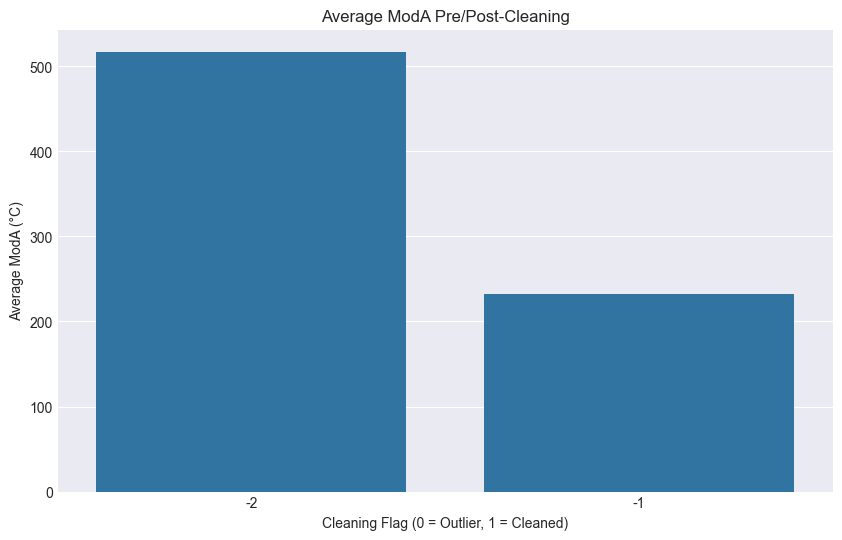

C:\Users\hp\AppData\Local\Temp\ipykernel_20324\695238439.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cleaning_Flag', y='ModB', data=df, estimator=np.mean, ci=None)


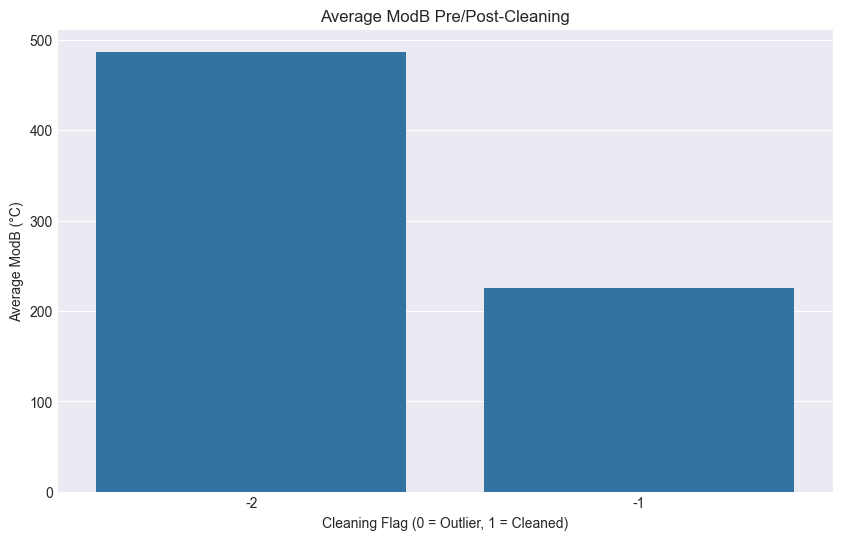

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cleaning_Flag', y='ModA', data=df, estimator=np.mean, ci=None)
plt.title('Average ModA Pre/Post-Cleaning')
plt.xlabel('Cleaning Flag (0 = Outlier, 1 = Cleaned)')
plt.ylabel('Average ModA (°C)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cleaning_Flag', y='ModB', data=df, estimator=np.mean, ci=None)
plt.title('Average ModB Pre/Post-Cleaning')
plt.xlabel('Cleaning Flag (0 = Outlier, 1 = Cleaned)')
plt.ylabel('Average ModB (°C)')
plt.show()

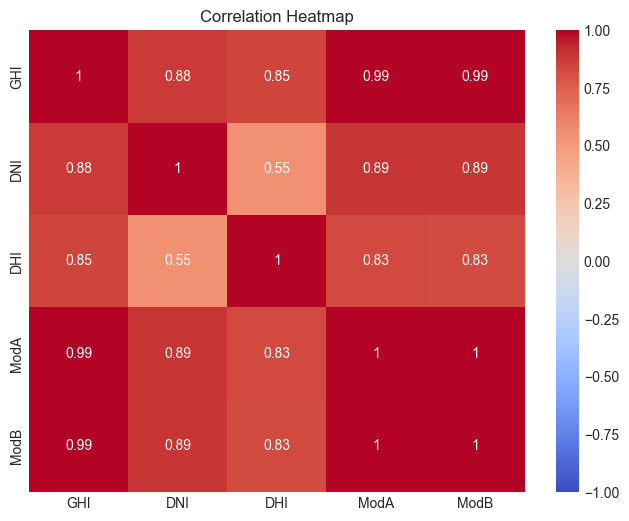

In [18]:
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

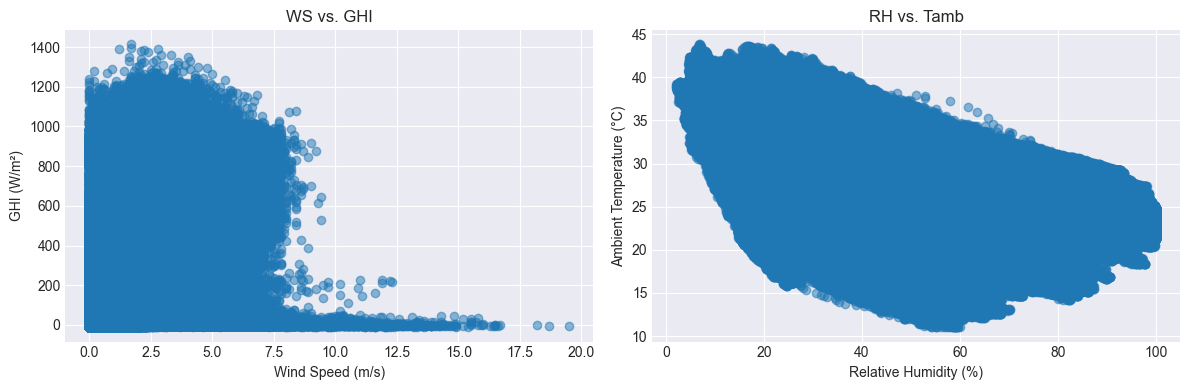

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('WS vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

plt.tight_layout()
plt.show()

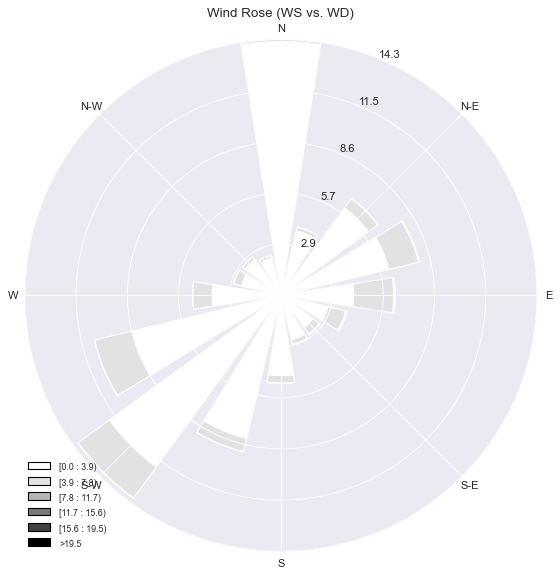

In [20]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (WS vs. WD)')
plt.show()

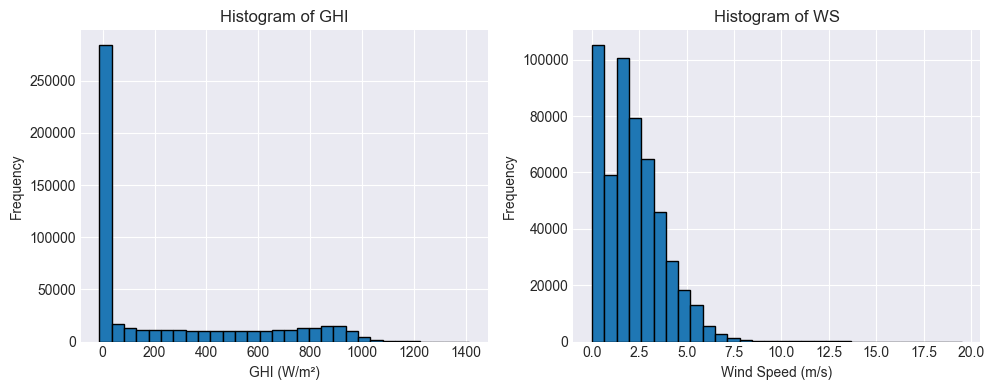

In [21]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, edgecolor='black')
plt.title('Histogram of WS')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

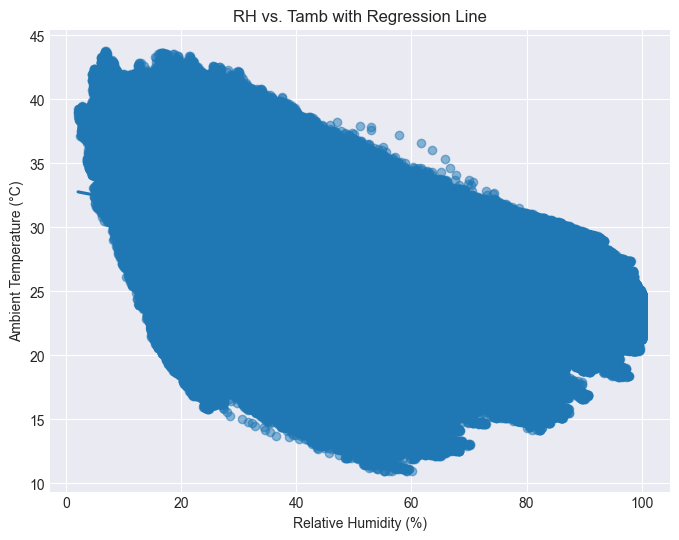

Correlation between RH and Tamb: -0.415


In [22]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='RH', y='Tamb', data=df, scatter_kws={'alpha':0.5})
plt.title('RH vs. Tamb with Regression Line')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

# Correlation
rh_tamb_corr = df['RH'].corr(df['Tamb'])
print(f"Correlation between RH and Tamb: {rh_tamb_corr:.3f}")